In [131]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [132]:
x_data = np.genfromtxt("Assignment_1_datasets/logisticX.csv",delimiter=',')
x_data = (x_data - np.mean(x_data,axis=0) ) / np.std(x_data,axis=0)
x_data = np.hstack((x_data,np.ones((100,1))))
y_data = np.genfromtxt("Assignment_1_datasets/logisticY.csv")

In [130]:
x_data.shape

(100, 3)

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [112]:
theta  = np.asarray([0,0,0]) # theta_1,theta_0
lr = 1
iteration = 1

In [120]:
while True:
    hx = sigmoid(np.matmul(x_data,theta))
    grad = np.matmul(x_data.T,y_data - hx)
    hessian = np.asarray([[np.sum(x_data[:,j]*x_data[:,k]*(1-hx)*hx) for j in range(3)] for k in range(3)])
    theta = theta - lr*np.matmul(np.linalg.inv(hessian),grad)
    iteration+=1
    break

/home/madhur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


## diverges after some iterations

In [118]:
theta

array([-247.73634569,  231.78187867,   32.04396597])

## equation of boundary is -3.7 x_0 + 3.62 x_1 + 0.44 

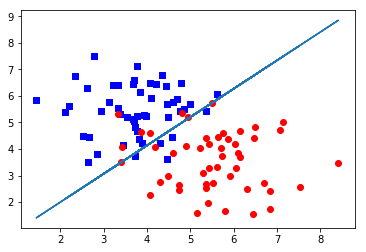

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
markers = ["s","o"]
colors = ["b","r"]
for i, c in enumerate(np.unique(y_data)):
    ax.scatter(x_data[:,0][y_data==c],x_data[:,1][y_data==c],c=colors[i], marker=markers[i])
ax.plot(x_data[:,0],(-theta[2]-theta[0]*x_data[:,0] )/ theta[1])